# 探索用户数据

In [108]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [109]:
MOIVE_DATA_DIR="file:///home/sl/workspace/data/nlp/ml-100k"

In [110]:
conf = SparkConf().setAppName("miniProject").setMaster("local[*]")
sc = SparkContext.getOrCreate(conf)

sentencesRDD = sc.parallelize(['Hello world', 'My name is Patrick'])
wordsRDD = sentencesRDD.flatMap(lambda sentence: sentence.split(" "))

print(wordsRDD.collect())
print(wordsRDD.count())

['Hello', 'world', 'My', 'name', 'is', 'Patrick']
6


In [111]:
logFile = f"{MOIVE_DATA_DIR}/u.user"  
user_data = sc.textFile(logFile)
user_data.first()



'1|24|M|technician|85711'

In [112]:
user_fields = user_data.map(lambda line: line.split("|"))

num_users = user_fields.map(lambda fields: fields[0]).count()

num_genders = user_fields.map(lambda fields: fields[2]).distinct().count()
num_occupationss = user_fields.map(lambda fields: fields[3]).distinct().count()
num_zipcodes = user_fields.map(lambda fields: fields[4]).distinct().count()

print(f"User: {num_users} num_genders:{num_genders} num_occupationss:{num_occupationss} num_zipcodes:{num_zipcodes}")



User: 943 num_genders:2 num_occupationss:21 num_zipcodes:795


Text(0, 0.5, 'Employee')

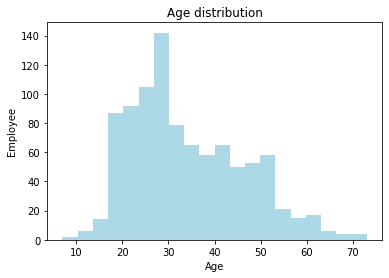

In [113]:
ages =  user_fields.map(lambda fields: int(fields[1])).collect()


fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(ages,bins=20,color='lightblue')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Employee')



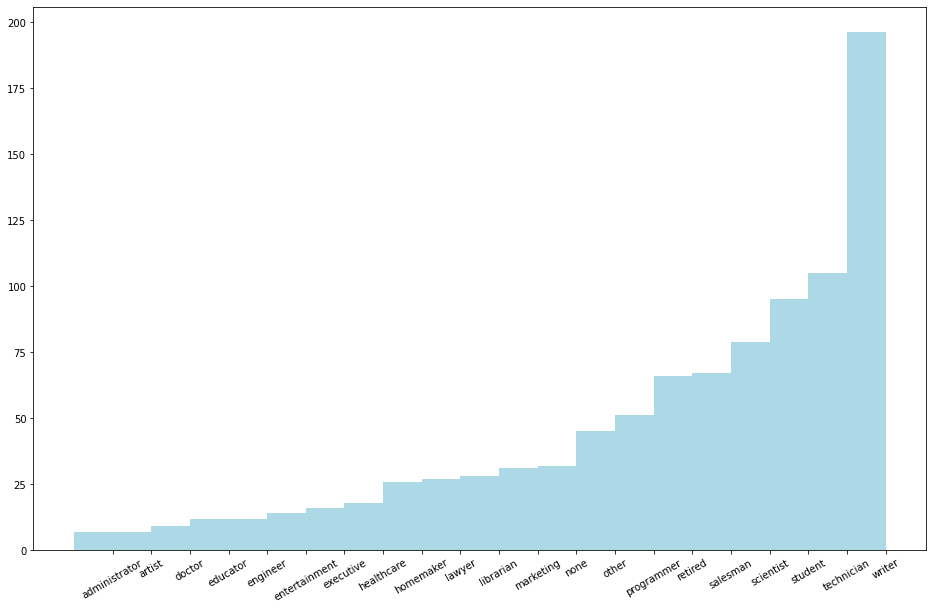

In [114]:
count_by_occupation = user_fields.map(lambda fields: (fields[3],1)).reduceByKey(lambda x,y:x+y).collect()
x_axis1 = np.array([c[0] for c in count_by_occupation])                                     
y_axis1 = np.array([c[1] for c in count_by_occupation])   

x_axis = x_axis1[np.argsort(x_axis1)]
y_axis = y_axis1[np.argsort(y_axis1)]

pos = np.arange(len(x_axis))
width = 1.0

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x_axis)

plt.bar(pos,y_axis,width,color='lightblue')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16,10)


In [115]:
count_by_occupation2 = user_fields.map(lambda fields: fields[3]).countByValue()
print(dict(count_by_occupation2))

print(dict(count_by_occupation))

{'technician': 27, 'other': 105, 'writer': 45, 'executive': 32, 'administrator': 79, 'student': 196, 'lawyer': 12, 'educator': 95, 'scientist': 31, 'entertainment': 18, 'programmer': 66, 'librarian': 51, 'homemaker': 7, 'artist': 28, 'engineer': 67, 'marketing': 26, 'none': 9, 'healthcare': 16, 'retired': 14, 'salesman': 12, 'doctor': 7}
{'other': 105, 'executive': 32, 'administrator': 79, 'student': 196, 'educator': 95, 'programmer': 66, 'homemaker': 7, 'artist': 28, 'engineer': 67, 'none': 9, 'retired': 14, 'doctor': 7, 'technician': 27, 'writer': 45, 'lawyer': 12, 'scientist': 31, 'entertainment': 18, 'librarian': 51, 'marketing': 26, 'healthcare': 16, 'salesman': 12}


# 探索电影数据

In [116]:
moive_data_file = f"{MOIVE_DATA_DIR}/u.item"  
moive_data = sc.textFile(moive_data_file)
moive_data.first()

num_moives = moive_data.count()

In [117]:
def convert_year(x):
    try:
        return int(x[-4:])
    except:
        return 1900

moive_fields = moive_data.map(lambda line: line.split("|"))
years = moive_fields.map(lambda fields: fields[2]).map(lambda x: convert_year(x))

years_filtered = years.filter(lambda x :x != 1900)

years_filtered.first()

1995

In [118]:
moive_ages =  years_filtered.map(lambda yr: 1998-yr).countByValue()
values = moive_ages.values()
bins = moive_ages.keys()
moive_ages

x = [var for var in values]
y = [var for var in bins]

print(values)
print(bins)

# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.hist(y,bins=y,color='lightblue')

# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(16,10)

dict_values([219, 355, 214, 5, 4, 126, 5, 13, 24, 37, 22, 4, 286, 12, 3, 3, 3, 7, 5, 6, 4, 7, 7, 11, 4, 9, 13, 15, 15, 8, 8, 7, 2, 8, 5, 8, 5, 6, 65, 8, 7, 2, 5, 5, 2, 4, 6, 9, 4, 5, 4, 4, 2, 2, 5, 5, 3, 4, 4, 3, 4, 5, 2, 4, 1, 3, 1, 1, 5, 1, 1])
dict_keys([3, 2, 4, 31, 21, 5, 33, 16, 8, 6, 7, 61, 1, 17, 28, 26, 37, 59, 57, 30, 29, 44, 27, 10, 25, 19, 11, 12, 9, 24, 18, 13, 32, 41, 38, 14, 15, 23, 0, 58, 48, 34, 47, 36, 65, 42, 35, 40, 53, 22, 20, 39, 56, 45, 52, 43, 60, 64, 49, 50, 55, 54, 62, 63, 68, 46, 67, 76, 51, 66, 72])


# 探索评级数据

In [127]:
rating_data_file = f"{MOIVE_DATA_DIR}/u.data"  
rating_data = sc.textFile(rating_data_file)
print(rating_data.first())

num_rating = rating_data.count()
print(f"num of rating {num_rating}")

196	242	3	881250949
num of rating 100000


In [128]:
rating_data = rating_data.map(lambda line: line.split("\t"))
rating = rating_data.map(lambda fields: int(fields[2]))
# print(rating)

# max_rating = rating.reduce(lambda x,y: max(x,y))
# min_rating = rating.reduce(lambda x,y: min(x,y))
# mean_rating = rating.reduce(lambda x,y: x+y) / num_rating
# median_rating =  np.median(rating.collect())
# rating_per_user = num_rating/ num_users
# rating_per_moive = num_rating/ num_moives

# print(f" min :{min_rating} max :{max_rating} mean :{mean_rating} median :{median_rating} ")
# print(f" rating_per_user :{rating_per_user} rating_per_moive :{rating_per_moive}")

print(rating.stats())

(count: 100000, mean: 3.5298600000000024, stdev: 1.125667970762251, max: 5.0, min: 1.0)


In [137]:
user_ratings_grouped= rating_data.map(lambda fields: (int(fields[0]),int(fields[2]))).groupByKey()
user_ratings_grouped.take(5)
# user_ratings_byuser = user_ratings_grouped.map(lambda (k,v): (k,len(values)))
# user_ratings_byuser.take(5)


[(196, <pyspark.resultiterable.ResultIterable at 0x7fadbe1407b8>),
 (186, <pyspark.resultiterable.ResultIterable at 0x7fadbe140668>),
 (22, <pyspark.resultiterable.ResultIterable at 0x7fadbe140c50>),
 (244, <pyspark.resultiterable.ResultIterable at 0x7fadbe140438>),
 (166, <pyspark.resultiterable.ResultIterable at 0x7fadbe140da0>)]